#ENTROPY

In [1]:
import numpy as np
x1 = np.linspace(0.01,1,10)
x2 = 1-x1

ye = -x1*np.log2(x1) - x2*np.log2(x2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """


In [2]:
ye

array([0.08079314, 0.52936087, 0.7780113 , 0.9248187 , 0.99277445,
       0.98958752, 0.91492637, 0.7601675 , 0.49991596,        nan])

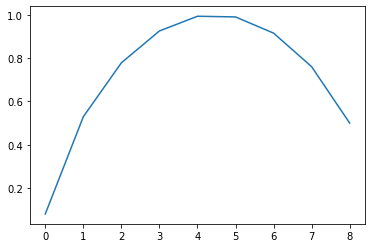

In [3]:
import matplotlib.pyplot as plt
plt.plot(ye)

In [4]:
yg = 1-(x1*x1)-(x2*x2)

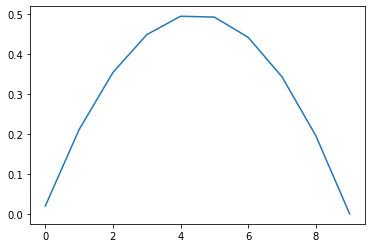

In [5]:
plt.plot(yg)

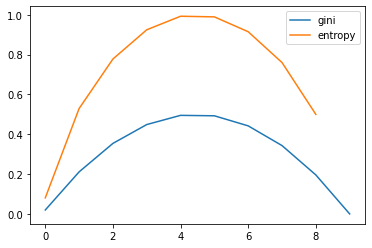

In [6]:
plt.plot(yg,label='gini')
plt.plot(ye,label='entropy')
plt.legend()

In [8]:
 import pandas as pd
 
 df=pd.read_csv("/content/play_tennis (1).csv")

In [9]:
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [10]:
df=df.drop('day',axis=1)

In [11]:
X=df.drop('play',axis=1)
Y=df['play']

In [12]:
col='outlook'
row = 'Sunny'

i=X[col] == row
X[i]

,outlook,temp,humidity,wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
7,Sunny,Mild,High,Weak
8,Sunny,Cool,Normal,Weak
10,Sunny,Mild,Normal,Strong


In [13]:
class Node():
  def __init__(self):
    pass

  def gini(self,X,Y):
    return 1-(Y.value_counts(normalize=True)**2).sum()

  def fit(self,X,Y):

    self.dummy_label = Y.iloc[0] 
    self.label_dtype = Y.dtype

    H=self.gini(X,Y)


    if H==0: #PureNode
      self.typ = 'pure'
      self.ans = Y.iloc[0]
    else:
      maxIG=0
      maxfet=''
      for col in X.columns:
        wimpurity=0
        for val in X[col].unique(): #har column pr unique value aajayega
            ind = X[col] == val #True False Aajayega
            nx=X[ind]
            ny=Y[ind]
            wimpurity += nx.shape[0]*self.gini(nx,ny)/X.shape[0]
        IG = H-wimpurity
        if IG > maxIG:
          maxIG = IG 
          maxfet = col


      self.typ = 'decision'
      self.fet = maxfet
      self.decision ={}
      for val in X[maxfet].unique(): #Splitting
          node = Node() #object
          self.decision[val]=node
          ind = X[self.fet]==val
          nx=X[ind]
          ny=Y[ind]
          node.fit(nx,ny)    




  def pred(self,x): #x sample kaun se class ka hai
    if self.typ == 'pure':#pure wala
      return self.ans
    else:#decision wala
      val = x[self.fet]
      return self.decision[val].pred(x)





  def  predict(self,X):
    y_pred = np.full(X.shape[0],self.dummy_label,dtype=self.label_dtype)

    for i,(_,x) in enumerate(X.iterrows()):
      lab=self.pred(x)#x sample
      y_pred[i]=lab

    return y_pred     

In [14]:
model = Node()
model.fit(X,Y)

In [15]:
model.decision['Sunny'].typ

'decision'

In [16]:
model.decision['Sunny'].decision['Normal'].typ

'pure'

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(Y,model.predict(X))

1.0

#Regression

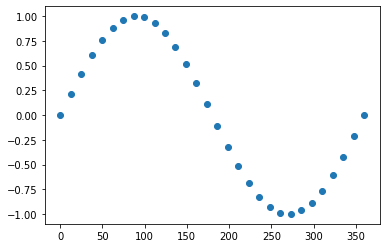

In [19]:
x=np.linspace(0,360,30)
y=np.sin(np.deg2rad(x))

plt.scatter(x,y)

In [20]:
X=x.reshape(-1,1)

In [21]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()

reg.fit(X,y)

DecisionTreeRegressor()

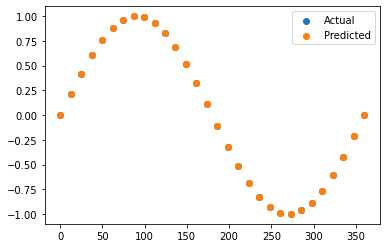

In [22]:
plt.scatter(x,y,label='Actual')
plt.scatter(x,reg.predict(X),label="Predicted")
plt.legend()
plt.show()

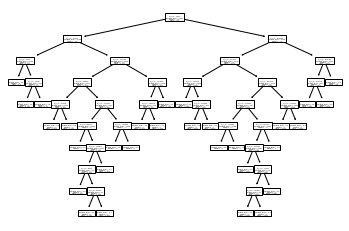

In [23]:
from sklearn import tree
tree.plot_tree(reg)
plt.show()

In [24]:
reg = DecisionTreeRegressor(max_depth = 3) #stop tree growth using depth

reg.fit(X,y)



DecisionTreeRegressor(max_depth=3)

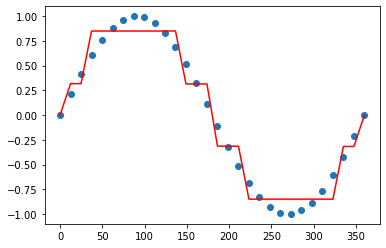

In [25]:
plt.scatter(x,y,label='actual')
plt.plot(x,reg.predict(X),label='predict',color = 'r')

In [26]:
from ipywidgets import interact




In [27]:
def fun(max_depth,min_samples_split):
  reg = DecisionTreeRegressor(max_depth = max_depth,min_samples_split=min_samples_split)
  reg.fit(X,y)
  print('depth',reg.get_depth())
  plt.scatter(x,y,label = 'actual')
  plt.scatter(x,reg.predict(X),label = 'predict',color = 'r')
  plt.legend()
  plt.show()
  plt.figure(figsize=(10,10))
  tree.plot_tree(reg,filled=True)
  plt.show()

interact(fun,max_depth=3,min_samples_split=3)  


interactive(children=(IntSlider(value=3, description='max_depth', max=9, min=-3), IntSlider(value=3, descripti…

<function __main__.fun>

# Classification

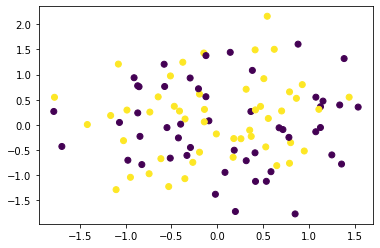

In [28]:

from sklearn.datasets import make_circles

X,y = make_circles(noise=0.5)
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()


In [29]:

from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions




def fun(max_depth,mf):
  reg = DecisionTreeClassifier(max_depth = max_depth,max_features=mf)
  reg.fit(X,y)
  print('depth',reg.get_depth())
  plot_decision_regions(X,y,clf=reg)
  plt.show()
  plt.figure(figsize=(10,10))
  tree.plot_tree(reg,filled=True)
  plt.show()

interact(fun,max_depth=3,mf=1.0)

interactive(children=(IntSlider(value=3, description='max_depth', max=9, min=-3), FloatSlider(value=1.0, descr…

<function __main__.fun>

In [30]:
def fun(alpha):
  reg = DecisionTreeClassifier(ccp_alpha=alpha)
  reg.fit(X,y)
  print('depth',reg.get_depth())
  plot_decision_regions(X,y,clf=reg)
  plt.show()
  plt.figure(figsize=(10,10))
  tree.plot_tree(reg,filled=True)
  plt.show()

interact(fun,alpha=10)

interactive(children=(IntSlider(value=10, description='alpha', max=30, min=-10), Output()), _dom_classes=('wid…

<function __main__.fun>